### One-hot Encoding  Machine Learning Performance

In [20]:
import re
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [75]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Load Data

URL : https://www.kaggle.com/rchitic17/real-or-fake

In [3]:
#Read Data
df=pd.read_csv('fake_or_real_news.csv')
df.shape

(6335, 4)

In [4]:
df['Nlabel'] = np.where((df['label']=='FAKE') , 0, 1)

In [5]:
df.head(10)

,Unnamed: 0,title,text,label,Nlabel
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,0
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,0
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,1
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,1
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,1


In [6]:
df.shape

(6335, 5)

In [7]:
# Drop Nan Value
df=df.dropna()
df.shape

(6335, 5)

In [8]:
## Get the Independent Features
X=df.drop('Nlabel',axis=1)
## Get the Dependent features
y=df['Nlabel']

In [9]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.shape

(6335, 6)

### Vocabulary Size

In [10]:
### Vocabulary size
voc_size=5000

### Data Preprocessing

In [11]:
# Data Preprocessing
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
## One hot Representation
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [13]:
#Sentence Length
sent_length=0
for review_number in range(len(corpus)):
    number_of_words = len(corpus[review_number])
    if(number_of_words) > sent_length:
        sent_length = number_of_words
print(sent_length)

180


In [14]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  849 2393 1358]
 [   0    0    0 ... 4353 3967 4667]
 [   0    0    0 ... 4500 3299  217]
 ...
 [   0    0    0 ... 4117  562 3431]
 [   0    0    0 ... 3475 1360 2027]
 [   0    0    0 ... 2084 4353  238]]


In [15]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

### Data Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=0)

# Machine Learning Algorithms

## Naive Bayes  : BernoulliNB

accuracy:   0.599053
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.64      0.41      0.50       615
           1       0.58      0.78      0.67       652

    accuracy                           0.60      1267
   macro avg       0.61      0.59      0.58      1267
weighted avg       0.61      0.60      0.58      1267



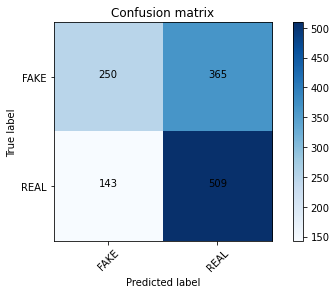

In [17]:
from sklearn.naive_bayes import BernoulliNB
bern=BernoulliNB(alpha = 0.01)
bern.fit(X_train, y_train)
pred_bern = bern.predict(X_test)
score_bern = metrics.accuracy_score(y_test, pred_bern)
print("accuracy:   %f" % score_bern)
cm_bern = metrics.confusion_matrix(y_test, pred_bern)
plot_confusion_matrix(cm_bern ,classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_bern))

### Logistic Regression

accuracy:   0.581689
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.62      0.37      0.46       615
           1       0.57      0.78      0.66       652

    accuracy                           0.58      1267
   macro avg       0.59      0.58      0.56      1267
weighted avg       0.59      0.58      0.56      1267



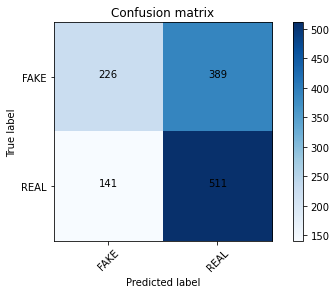

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 2 , solver = 'newton-cg')
LR.fit(X_train,y_train)
pred_lr=LR.predict(X_test)
score_lr = metrics.accuracy_score(y_test, pred_lr)
print("accuracy:   %f" % score_lr)
cm_lr = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm_lr, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_lr))

### Decision Tree

accuracy:   0.576953
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       615
           1       0.59      0.58      0.58       652

    accuracy                           0.58      1267
   macro avg       0.58      0.58      0.58      1267
weighted avg       0.58      0.58      0.58      1267



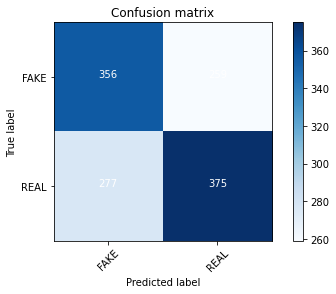

In [56]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = None, 
                            min_samples_split = 2, min_samples_leaf = 1)
DT.fit(X_train, y_train)
pred_dt = DT.predict(X_test)
score_dt = metrics.accuracy_score(y_test, pred_dt)
print("accuracy:   %f" % score_dt)
cm_dt = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm_dt, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_dt))

### Random Forest

accuracy:   0.611681
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       615
           1       0.62      0.65      0.63       652

    accuracy                           0.61      1267
   macro avg       0.61      0.61      0.61      1267
weighted avg       0.61      0.61      0.61      1267



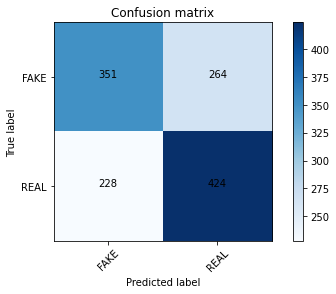

In [78]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 2,
                             min_samples_leaf = 1, max_leaf_nodes = None)
RFC.fit(X_train, y_train)
pred_rfc=RFC.predict(X_test)
score_rfc = metrics.accuracy_score(y_test, pred_rfc)
print("accuracy:   %f" % score_rfc)
cm_rfc = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm_rfc, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_rfc))

### Support Vector Machine

accuracy:   0.513812
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       615
           1       0.53      0.52      0.53       652

    accuracy                           0.51      1267
   macro avg       0.51      0.51      0.51      1267
weighted avg       0.51      0.51      0.51      1267



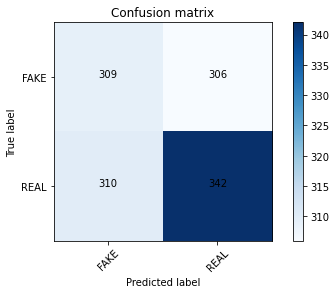

In [38]:
from sklearn import  svm
SVM = svm.SVC(kernel='sigmoid')
SVM.fit(X_train, y_train)
pred_svm=SVM.predict(X_test)
score_svm = metrics.accuracy_score(y_test, pred_svm)
print("accuracy:   %f" % score_svm)
cm_svm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm_svm, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_svm))

### ANN: MLPClassifier

C:\Users\elafa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


accuracy:   0.577
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.58      0.48      0.52       615
           1       0.58      0.67      0.62       652

    accuracy                           0.58      1267
   macro avg       0.58      0.57      0.57      1267
weighted avg       0.58      0.58      0.57      1267



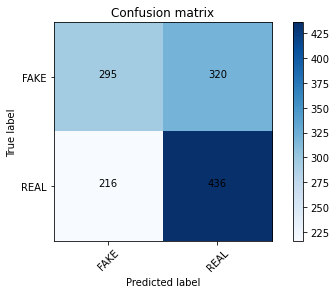

In [42]:
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='logistic',  solver='lbfgs',  early_stopping= False,
                                   alpha= 1 ,hidden_layer_sizes=(100))
MLPClassifierModel.fit(X_train, y_train)
pred_mlp=MLPClassifierModel.predict(X_test)
score_mlp= metrics.accuracy_score(y_test, pred_mlp)
print("accuracy:   %f" % score_mlp)
cm_mlp = metrics.confusion_matrix(y_test, pred_mlp)
plot_confusion_matrix(cm_mlp, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_mlp))